# 번역기를 만들어보자

### 기계 번역 이야기

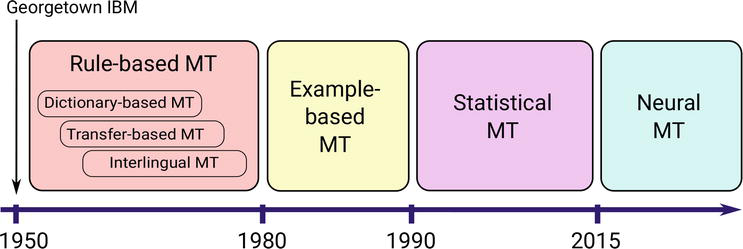

1940년대부터 1980년대까지의 기계 번역은 규칙 기반의 기계 번역(Rule-based Machine Translation)이 주를 이루었다. 예를 들어, 2차 세계 대전 시절 미국이 러시아어를 영어로 번역하고자 했을 때, 러시아 문장에서 단어 하나, 하나의 의미를 분석하고, 그 단어들이 어떻게 문버벅으로 연결되었는지를 분석하고, 그 다음 구조 상의 의미를 분석한 뒤에, 그제서야 영어와 의미적으로 맞게 단어들을 분리하고, 마지막으로 영어 문법에 맍게 다시 단어들의 순서를 맞추고...이야기만 들어도 굉장히 복잡했을 것 같다.

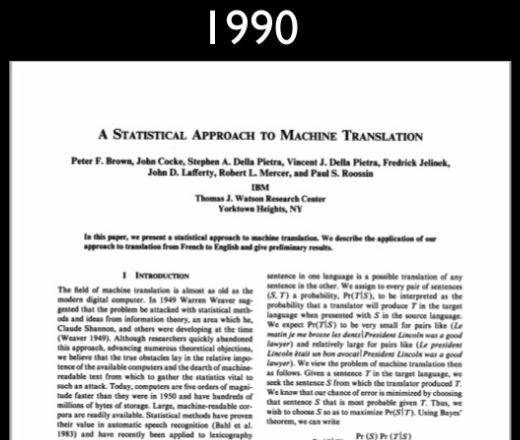

1980년 후반에 들어서 IBM 규칙 기반에서 벗어나려는 시도가 있었다.언어학 기반의 규칙이 아닌 통계로 구현하려는 시도였다. 이를 통계적 기계 번역(Statistical Machine Translation) 이라고 한다. 1980년대 당시 규칙 기반의 접근이 얼마나 답답했는 지 그 팀의 리더 프레데리 제리넥은 이 당시 '매번 내가 언어학자를 해고할 때마다, 언어 인식기의 성능이 올라갔다.'라는 말을 남겼다는 소문이 있다. 이 방법은 2010년 중반까지 주요한 접근으로 사둉되었다.

통계 기반 번역에 여러 머신 러닝 기법이 사용되었는지만 딥러닝은 아니었다. 인공 신경망으로 번역을 제안하는 논문은 몇 편 있었지만, 훈련 데이터도 적고 신경망의 크기도 작아서 주목받지 못했다. 그러나 2010년 중반에 들어 알고리즘과 하드웨어 발전으로 딥러닝이 빛을 발하면서 달라졌다.

구글은 2016년 9월. 자신들의 구글 번역기에 신경망 기계 번역(Neural Machine Translation, NMT)을 도입하면서 획기적인 성능 개선을 이뤘다고 발표했다. 통계 기반 번역에서 신경망 기계 번역으로 변경되면서, 한층 더 높은 수준의 번역 능력을 가질 수 있게 되었다. 이 때 사용된 인공 신경망이 seq2seq이다. (물론 실제로는 몇 가지 추가적인 메커니즘이 들어가 있다.) 

### 시퀀스 처리하는 RNN

앞서 시퀀스 데이터를 처리하는 RNN에 대해 배웠다. RNN은 어떻게 호라용하느냐에 따라서 다양한 어플리케이션에서 사용할 수 있다.

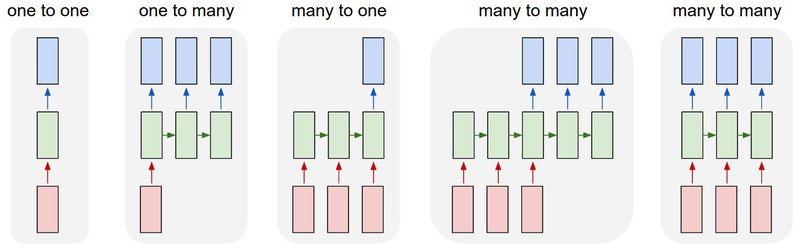

위의 그림은 다양한 RNN의 활용 방법을 보여주고 있다. 좌측부터 차례대로 1번부터 5번이라고 번호를 붙였다고 가정하고 설명해보겠다. 1번 one-to-one은 순환하지 않으므로 일반적인 피드 포워드 신경망이다. 2번 one-to-many는 순환을 하기 시작하니까 본격적인 RNN이다. 하나의 입력으로부터 다수의 출력을 내는 경우인데, 예를 들어 하나의 이미지를 받아서 이미지의 제목, 다시 말해 단어 시퀀스를 출력하는 이미지 캡서닝(image captioning) 작업이 이에 속한다.

2번과 반대처럼 보이는 3번 many-to-one은 시퀀스를 입력받아서 하나의 결과를 내는 RNN으로 텍스트 분류(text classification)에 사용할 수 있다. 가령, 스팸 메일 분류기라고 하면 메일을 입력받아서 이 메일이 '정상 메일'인지 '스팸 메일'인지를 결과를 알 수 있다.

5번으로 가보자. 5번 many-to-many는 시퀀스를 입력받아 시퀀스를 출력하는데, 매 time step마다 바로 출력을 하는 구조이다. 이 구조는 입력 문장의 각 단어가 무엇인지를 알려주는 개체명 인식이나 품사 태깅에 사용할 수 있다. 

이제 4번을 볼까요? many-to-many이지만, 5번이랑은 다르다. 입력을 받는 동안 출력을 내지 않다가 어느 time step부터 출력을 시작한다. 아마 어떤 기준이 있지 않을까 싶다. 구현하기가 5번보다는 까다로울 것 같다는 생각이 든다.

사실, 기계 번역기 구현은 기본적으로 4번을 활용해야 한다. 그 이유는 '사람 말은 끝까지 들어봐야한다'라는 현인들의 말과 연관이 있다. 번역 또는 통역이라고 하는 것은 전체 문장을 모두 읽거나 듣고나서야  할 수 있기 때문이다. 번역이나 통역에 5번을 사용하면 아직 사람 말이 다 안 끝났는데 단 어 하나를 들을 때 마다 그 순간 번역한다는 뜻인데 그 최종 번역이 제대로 된 문장일리가 없다.

### seq2seqe

#### seq2seq의 인코더 - 디코더 구조


앞서 번역기는 다양한 RNN의 유형 그림중에서도 4번을 사용한다고 했다. 사실 더 자세히 말하면 4번 그림보다 조금 ~ 더 복잡하다. 아래의 그림은 번역기의 기본 구조인 seq2seq이다.



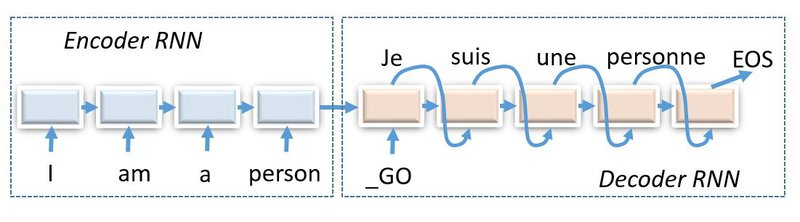

seq2seq는 두 개의 RNN 아키택처를 연결한 구조다. 입력 문장을 받는 RNN을 이코더라고 하고, 두번쨰 RNN을 디코더라고 한다.

아래 그림에서 Encoder는 Feature Extractor의 역활을 한다. 어떤 데이터 X를 해석하기 위한 저차원의 feature vectro z를 만들어 낸다. 반면에 Decoder는 저차원의 feature z로부터 정보를 복원해서 다시 어떤 데이터 X'을 재생성하는 역활을 한다.

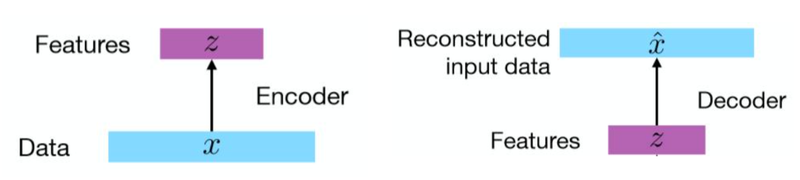

우리가 오늘 만들 seq2seq 모델은 위 인코더-디코더 모델에서 인코더와 디코더 모델이 모두 RNN인 경우라고 볼 수 있다. 그렇다면 seq2seq의 feature vector는 무엇일까? 바로 인코더 RNN이 입력문장을 해석해서 만들어 낸 hidden state 벡터일 것이다. 즉, A언어의 문장 X를 z라는 hidden state로 해석한 후 z를 다시 B언어의 문장 Y로 재생성하는 것이다. 그러므로 인코더에서 필요한 것은 인코더의 마지막 time step의 hidden state이다. 그리고 이를 두번째 RNN인 디코더에 전달한다.

디코더는 인코더의 마지막 time step의 hidden state를 전달 받아 자신의 초기 hidden state로 하고, 출력 문장을 생성해내기 시작한다. 여기서는 특수 문자를 사용해서 출력 문장의 시작과 종료를 알려주어야 한다. 위의 그림에서는 _Go와 EOX가 각각 시작 문자와 종료 문자에 해당한다. 문헌에 따라서는 SOS와 EOS라고도 하는데, SOS는 start of sequence를 의미하며, EOS는 end of sequence를 의미한다.

#### Conditional Language Model

문장 생성기(Text Generator)모델을 만들어 보았다면, 그러한 문장 생성기는 언어 모델(Language Mpdel)을 구현한 것이라는 것을 알고 있다.

언어 모델이란 n-1개의 단어 시퀀스 w1,...,wn-1가 주어졌을 때, n번째 단어 wn으로 무엇이 올지를 예측하는 확률 모델이다. 파라미터 0로 모델링하는 언어 모델을 다음과 같이 표현할 수 있다.

P(w 
n
​
 ∣w 
1
​
 ,...,w 
n−1
​
 ;θ)



우리가 알고 있는 RNN 계열의 모델들은 이러한 언어 모델을 구현하기에 적합한 것들이다.

그런데, 언어모델에 기반한 문장 생성기가 가지고 있는 한가지 문제점이 있다. 그것은 바로, 어떤 말을 만들고 싶은지를 제어할 수 없다는 점이다. RNN 모델이 확률적으로 그 다음 나올 단어들을 순차적으로 만들어 나가게 되는데, 그것을 상황에 맞게 제어할 수 있다면 아주 유용할 것이다. 그래서 사람들은 위 언어모델을 확장해서 조건적 언어모델(Conditional Language Model)의 개념을 생각하게 된다. 말하자면 아래와 같은 형태가 된다.


P(w 
n
​
 ∣w 
1
​
 ,...,w 
n−1
​
 ,c;θ)

위 식과 다르게 c라는 것이 하나 더 붙었지요? 이 c를 이용해 기계에서 '아무 문장이나 만들지 말고, c에 적합한 문장을 만들어'라고 주문하고 싶은 것이다.

기계번역이야말로 가장 대표적인 Conditional Language Model의 사례가 된다. 'X라는 영어 문장을 Y라는 프랑스어 문항으로 번형해'라는 것은 바꾸어 말하면, '프랑스어 문장 Y를 만들어 봐, 단 그 문장은 영어로는 X라는 뜻이어야 해.'라는 뜻이 된다. 그런데 이 조건을 어떻게 문장생성기에 넣어 줄까? 그렇다. 이 문장 X를 해석해서 c로 만드는 인코더를 또다른 RNN으로 만드는 것이다. 그렇게 만든 c를 다시 문장생성기인 디코더 RNN에 입력으로 넣어주는 모델을 만들어 낸 것이 바로 오늘게 다루게 될 seq2seq것이다.

### 교사 강요(teacher forcing)

seq2seq는 훈련 과정과 테스트 과정에서의 동작 방식이 다르다는 특징이 있다. 이전 스텝의 그림으 보면 디코더 RNN은 이전 time step의 출력을 현재 time stpe의 입력으로 사용한다는 특징을 가지고 있다. 그런데 이는 테스트 과정에서의 이야기고, 훈련 과정은 조금 다른 방식을 사용한다. 그 이유는 훈련 과정에서 이전 time step이 잘못된 예측을 한다면 이를 입력으로 한 현재 time step의 예측도 잘못될 수도 있기 때문이다. 이런 상황이 반복되면 훈련 시간이 굉장히 늘어나게 된다.

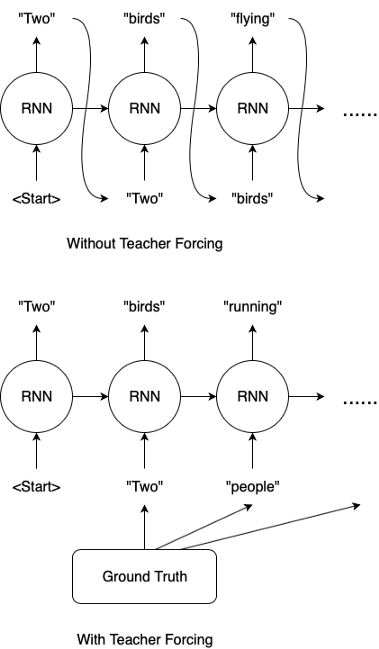

훈련 과정에서는 실제 정답 시퀀스를 알고 있는 상황이므로 이전 time step의 예측값을 현재 time step의 입력으로 사용하는 것이 아니라 이전 time step의 실제값으로 사용할 수 있다. 이 작업을 교사 강요(teacher forcing)이라고 한다. 이 기법은 seq2seq 뿐 아니라 sequence 데이터의 생성모델에서 일반적으로 사용되는 기법이기도 한다. 물론, 이는 모델이 훈련 데이터 외의 결과를 생성해내는 능력을 기리는데에 조금 방해가 될 수 있다는 단점도 존재한다.

### 단어 수준 vs 문자 수준

seq2seq는 단어 수준(word level) 또는 문자 수준(character level) 두 가지 방법으로 구현할 수 있다. 단어 수준이라고 함은 각 RNN의 time step의 입출력 단위가 단어 수준이라는 의미이고, 문자 수준이라 함은 RNN의 time step의 입출력 단위가 문자 수준. 영어에서는 알파벳 단위이다.

실제 구현 자체는 문자 수준이 더 쉬운데, 그 이유는 단어 수준 seq2seq의 경우 매 time step에서 디코더 RNN이 출력을 결정할 때, 훈련 데이터에 있는 전체 단어 집합의 수가 30만개라면 30만개 중 하나를 선택해야 하므로 출력층의 크기가 무려 30만이어야 한다.

하지만 문자 수준으로 구현하면 영문자 알파벳은 26개에 불과하므로 출력층의 크기가 굉장히 작아진다. 여기에 대, 소문자를 구분하지 않고 특수문자를 포함한다고 하더라도 출력층의 크기는 100을 넘지 않는다.

그렇다면 단어 수준의 번역과 문자 수준의 번역 둘 중 어느 쪽이 더 유리할까?

두 방법에는 장단점이 있다. 그리고 그 장단점은 서로 trade-off 관계이기도 하다.

단어 수준의 번역을 위해서 사전을 구축한다고 생각해보자. 가장 극단적인 경우에는 해당하는 한국어의 예를 들어 보자.



먹다, 먹는다, 먹고, 먹지, 먹을까.....

'먹다'라는 단어 하나에 이렇게 많은 변종이 있고, 이 의미가 전부 아주 약간 다르다. 이렇게 따지면 엄청나게 큰 단어 사전이 필요하게 된다. 영어에도 이런 문제가 있겠지만 한국어에 비하면.. 그 변화가 그리 심하지는 않는다. 또 하나의 단어 수준의 접근이 어려움은 띄어쓰기 문제이다. 특히 띄어쓰기가 많이 생략되는 한국어, 일본어 같은 언어들에 있어 이러한 전처리가 큰 어려움의 원인이 된다. 

그렇다면 문자 수준으로 번역하면 이런 문제가 없이 아주 깔끔하게 해결되겠다. 그러나 단어를 문자 수준으로 쪼갠다는 것은 단어 안에 내재된 정보가 소실된다는 것을 의미한다. 즉, 기계가 데이터를 통해 글자가 단어를 이루는 패턴까지 학습해 내야 한다는 것이다. 그래서 충분한 데이터가 확보되지 않았다면 일반적으로 문자 수준의 번역이 단어 수준의 번역보다 품질이 떨어진다. 

하지만, 최신 자연어처리의 흐름은 단어 수준이나 문자 수준의 번역이 아닌, 그 사이의 subword 기반의 번역이 주를 이루고 있다. 



오늘은 전처리와 훈련 시간을 고려하여 문자 수준으로 구축해보겠다. 그리고 일단 문자 수준 번역기를 구축하고 나면 단어 수준 모델로 변환하는 것은 굉장히 쉽다.

### 번역기 만들기 (1) 데이터 전처리

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 해당 파일을 데이터프레임으로 읽어온다.

file_path = '/content/drive/MyDrive/새홀리기/fra.txt'
lines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')
print('전체 샘플의 수 :',len(lines))
lines.sample(5) #샘플 5개 출력

전체 샘플의 수 : 194513


,eng,fra,cc
33998,Are they all strong?,Sont-ils tous forts ?,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
113037,You must work hard to succeed.,Il vous faut travailler dur pour réussir.,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
66806,Tom seemed disappointed.,Tom avait l'air déçu.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
105825,Winds from the sea are humid.,Les vents de mer sont humides.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
112591,Where do we get the textbooks?,Où dégotons-nous les manuels ?,CC-BY 2.0 (France) Attribution: tatoeba.org #1...


In [5]:
# 세번째 열은 불필요하므로 제거하고, 훈련 데이터는 5만개의 샘플로 줄이겠다.

lines = lines[['eng', 'fra']][:50000] # 5만개 샘플 사용
lines.sample(5)

,eng,fra
40362,Can you do it faster?,Peux-tu le faire plus vite ?
36018,I sleep standing up.,Je dors debout.
18062,He's a cat lover.,Il adore les chats.
4407,Are you home?,Êtes-vous chez vous ?
8265,Our team lost.,Notre équipe perdit.


seq2seq 동작을 위해서 디코더의 입력과 예측에는 시작 토큰 <sos>와 종료 토큰 <eos>가 필요하다. 이번에는 각각 \t와 \n을 사용하겠다. 두 토큰을 추가하겠다.

In [6]:
# 시작 토큰과 종료 토큰 추가
sos_token = '\t'
eos_token = '\n'
lines.fra = lines.fra.apply(lambda x : '\t '+ x + ' \n')
print('전체 샘플의 수 :',len(lines))
lines.sample(5)

전체 샘플의 수 : 50000


,eng,fra
32097,This should be fun.,\t Ça devrait être amusant. \n
5819,Take it easy.,\t Reste cool. \n
36947,"It's mine, not hers.","\t C'est la mienne, pas la sienne. \n"
12709,You seem angry.,\t Vous avez l'air énervé. \n
27163,What should I eat?,\t Que devrais-je manger ? \n


이제 단어장(vocabulary)을 만들고, 각 단어에 부여된 고유한 정수로 텍스트 시퀀스를 정수 시퀀스로 변환하는 정수 인코딩 과정을 거치겠다. 이때 영어와 프랑스어는 사용하는 언어가 다르므로 단어장을 별도로 만들어준다. 그리고 정상적으로 정수 시퀀스로 변환되었는지 3개의 행을 출력한다.

In [7]:
eng_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. 
eng_tokenizer.fit_on_texts(lines.eng)               # 50000개의 행을 가진 eng의 각 행에 토큰화를 수행
input_text = eng_tokenizer.texts_to_sequences(lines.eng)    # 단어를 숫자값 인덱스로 변환하여 저장
input_text[:3]

[[19, 3, 8], [19, 3, 8], [19, 3, 8]]

In [8]:
fra_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. 
fra_tokenizer.fit_on_texts(lines.fra)                 # 50000개의 행을 가진 fra의 각 행에 토큰화를 수행
target_text = fra_tokenizer.texts_to_sequences(lines.fra)     # 단어를 숫자값 인덱스로 변환하여 저장
target_text[:3]

[[10, 1, 19, 5, 1, 31, 1, 11],
 [10, 1, 15, 5, 12, 16, 29, 2, 14, 1, 11],
 [10, 1, 26, 9, 8, 28, 2, 1, 31, 1, 11]]

단어장의 크기를 변수로 저장해준다. 0번 토큰을 고려하여 +1을 하고 저장해준다.

In [9]:
eng_vocab_size = len(eng_tokenizer.word_index) + 1
fra_vocab_size = len(fra_tokenizer.word_index) + 1
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)

영어 단어장의 크기 : 53
프랑스어 단어장의 크기 : 73


이제 영어 데이터와 프랑스어 데이터의 최대 길이를 각각 구해보겠다. 이는 패딩(<pad>)을 위함이다. 모델에 입력될 영어, 프랑스어 시퀀스의 길이가 일정해야 하므로, 최대 길이로 맞추고 남는 시퀀스 뒷부분을 패딩으로 채우게 된다.

In [10]:
max_eng_seq_len = max([len(line) for line in input_text])
max_fra_seq_len = max([len(line) for line in target_text])
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

영어 시퀀스의 최대 길이 22
프랑스어 시퀀스의 최대 길이 76


In [11]:
# 전체적인 통계 정보를 한꺼번에 출력해보자.

print('전체 샘플의 수 :',len(lines))
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

전체 샘플의 수 : 50000
영어 단어장의 크기 : 53
프랑스어 단어장의 크기 : 73
영어 시퀀스의 최대 길이 22
프랑스어 시퀀스의 최대 길이 76


인코더의 입력으로 사용되는 영어 시퀀스와 달리, 프랑스어 시퀀스는 2가지 버전으로 나누어 준비해야 한다. 하나는 디코더의 출력과 비교해야 할 정답 데이터로 사용해야 할 원래 목적에 따른 것이다. 그리고 다른 하나는 이전 스텝에서 언급했던 교사 강요(Teacher forcing)을 위해 디코더 입력으로 사용하기 위한 것이다.

이때, 디코더의 입력으로 사용할 시퀀스는 <eos> 토큰이 필요가 없고, 디코더의 출력과 비교할 스퀀스는 <sos>가 필요가 없기 때문이다. 가령, 영어로 'I am a person'이라는 문장을 프랑스어 'Je suis une personne'로 번역하는 번역기를 만든다고 해보자. 훈련 과정에서 디코더는 '<sos> Je suis une personne'를 입력받아서 'Je suis une personne <eos>'를 예측하도록 훈련되므로, 이런 방식으로 생성된 두가지 버전의 시퀀스를 준비해야 한다.

In [12]:
encoder_input = input_text
# 종료 토큰 제거
decoder_input = [[ char for char in line if char != fra_tokenizer.word_index[eos_token] ] for line in target_text] 
# 시작 토큰 제거
decoder_target = [[ char for char in line if char != fra_tokenizer.word_index[sos_token] ] for line in target_text]

In [13]:
# 디코더의 입력과 출력을 각각 출력햐보자.

print(decoder_input[:3])
print(decoder_target[:3])

[[10, 1, 19, 5, 1, 31, 1], [10, 1, 15, 5, 12, 16, 29, 2, 14, 1], [10, 1, 26, 9, 8, 28, 2, 1, 31, 1]]
[[1, 19, 5, 1, 31, 1, 11], [1, 15, 5, 12, 16, 29, 2, 14, 1, 11], [1, 26, 9, 8, 28, 2, 1, 31, 1, 11]]


디코더의 입력의 경우에는 숫자 12(<eos> 토큰)가 제거 되었고, 디코더의 출력의 경우에는 숫자 11(<sos> 토큰)이 제거되었다. 이제 패딩을 진행한다. 패딩을 진행하면 모든 샘플들의 길이가 정해준 길이로 동일하게 변형된다. 여기서는 아까 저장해두었던 가장 긴 샘플의 길이인 max_eng_seq_len, max_fra_seq_len를 각각 사용하였다.

이렇게 되면 영어 데이터의 모든 샘플들은 max_eng_seq_len의 길이를 가지고, 프랑스어의 모든 샘플들은 max_fra_seq_len의 길이가 된다.

In [14]:
encoder_input = pad_sequences(encoder_input, maxlen = max_eng_seq_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen = max_fra_seq_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen = max_fra_seq_len, padding='post')
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 데이터의 크기(shape) : (50000, 22)
프랑스어 입력데이터의 크기(shape) : (50000, 76)
프랑스어 출력데이터의 크기(shape) : (50000, 76)


모든 샘플들의 길이가 동일하게 변형된 것을 알 수 있다. 모든 샘플들의 길이가 동일하게 변환되는 과정에서 정해준 길이보다 짧은 데이터들은 뒤에 0(<pad>)로 채워진다. 인코더의 샘플 하나만 출력해보자.

In [15]:
print(encoder_input[0])

[19  3  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


앞서 [19, 3, 8]이라는 3개의 단어만 있단 샘플이 뒤에 0이 채워지면서 max_eng_seq_len의 값인 23의 길이를 가지게 되었따. 이제 각 정수에 대해서 백터화 방법으로 원-핫 인코딩을 선택한다.

In [16]:
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 데이터의 크기(shape) : (50000, 22, 53)
프랑스어 입력데이터의 크기(shape) : (50000, 76, 73)
프랑스어 출력데이터의 크기(shape) : (50000, 76, 73)


원 핫 인코딩을 하고나서의 데이터의 크기는 (샘플의 수 X 샘플의 길이 X 단어장의 크기)가 된다. 원-핫 인코딩은 각 정수를 단어장의 크기를 가지는 원-핫벡터로 인코딩하는 과정이기 때문이다.

마지막으로, 훈련과정의 validation을 위해 위에서 생성한 데이터 50000건 중 3000건만 검증데이터로 삼고, 나머지를 학습데이터로 삼겠다.

In [17]:
n_of_val = 3000

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('영어 학습데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 학습 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 학습 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 학습데이터의 크기(shape) : (50000, 22, 53)
프랑스어 학습 입력데이터의 크기(shape) : (50000, 76, 73)
프랑스어 학습 출력데이터의 크기(shape) : (50000, 76, 73)


### 번역기 만들기 (2) 모델 훈련하기



In [18]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model

먼저 인코더를 설계해볼까? 인코더는 디코더보다 상대적으로 간단하다. LSTM 셀을 설계하고나서 문장을 입력받으면 LSTM 셀이 마지막 time step의 hidden state와 cell state를 전달받아서 저장해준다. 앞서 인코더의 마지막 hidden state를 디코더의 첫번째 hidden state로 사용한다고 했었다. 일반적인 기본 RNN 경우에는 그것이 맞지만, 기본 RNN보다 좀 더 복잡한 LSTM의 경우에는 hidden state뿐만 아니라, cell state라는 것이 존재한다.

그래서 인코더 LSTM 셀의 마지막 time step의 hidden state와 cell state를 디코더 LSTM의 첫번째 hidden state와 cell state로 전달해 주어야 한다.

In [19]:
# 입력 텐서 생성.
encoder_inputs = Input(shape=(None, eng_vocab_size))
# hidden size가 256인 인코더의 LSTM 셀 생성
encoder_lstm = LSTM(units = 256, return_state = True)
# 디코더로 전달할 hidden state, cell state를 리턴. encoder_outputs은 여기서는 불필요.
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
# hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도 저장.
encoder_states = [state_h, state_c]

위의 코드를 한 줄, 한 줄 파악해보자.

첫번째 줄 : 우선 LSTM의 입력 텐서를 정의해준다. 입력 문장을 저장하게 될 변수 텐서이다.

두번째 줄 : 256의 hidden_size를 가지고 LSTM 셀을 만들어 준다. LSTM의 수용력(capcity)를 의미한다. return_state = True를 해서 hidden state와 cell state를 리턴받을 수 있도록 한다.

세번째 줄: 입력 텐서를 입력으로 마지막 time step의 hidden state와 cell state를 결과로 받는다. 

네번째 줄: 마지막 time step의 hidden state와 cell state를 encoder_state라는 하나의 변수에 저장해뒀다. 이를 디코더에 전달하면 된다.



이제 디코더를 설계해보자. 디코더도 인코더랑 몇 가지 세부 사항을 제외하고 거의 똑같다.

In [20]:
# 입력 텐서 생성.
decoder_inputs = Input(shape=(None, fra_vocab_size))
# hidden size가 256인 인코더의 LSTM 셀 생성
decoder_lstm = LSTM(units = 256, return_sequences = True, return_state=True)
# decoder_outputs는 모든 time step의 hidden state
decoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state = encoder_states)

세번째 줄을 보면 디코더의 인자로 initial_state가 추가 되었다. LSTM 셀의 초기 상태를 정의해줄 수 있는 인자다. 여기서는 이전에 지정한 인코더의 마지막 time step의 hidden state와 cell state를 사용했다. 디코더의 출력층을 설계해준다. 

In [21]:
decoder_softmax_layer = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

매 time step마다의 다중 클래스 분류 문제이므로 프랑스어 단어장으로부터 한 가지 문자만 선택하도록 한다. Dense의 인자로 프랑스어 단어장의 크기를 기재하고, 활성화 함수로 소프트맥스 함수를 사용. 최종적으로 인코더와 디코더를 연결해서 하나의 모델로 만들어 주면 된다. Model의 input과 Output의 정의를 유심히 살표보자.

In [22]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 53)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 73)]   0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        317440      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [23]:
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=50)

Epoch 1/50
368/368 [==============================] - 15s 24ms/step - loss: 0.8827 - val_loss: 0.7612
Epoch 2/50
368/368 [==============================] - 8s 21ms/step - loss: 0.5381 - val_loss: 0.6454
Epoch 3/50
368/368 [==============================] - 8s 21ms/step - loss: 0.4538 - val_loss: 0.5573
Epoch 4/50
368/368 [==============================] - 8s 21ms/step - loss: 0.3994 - val_loss: 0.5076
Epoch 5/50
368/368 [==============================] - 7s 20ms/step - loss: 0.3628 - val_loss: 0.4711
Epoch 6/50
368/368 [==============================] - 7s 20ms/step - loss: 0.3357 - val_loss: 0.4533
Epoch 7/50
368/368 [==============================] - 7s 20ms/step - loss: 0.3153 - val_loss: 0.4200
Epoch 8/50
368/368 [==============================] - 8s 21ms/step - loss: 0.2992 - val_loss: 0.4167
Epoch 9/50
368/368 [==============================] - 7s 20ms/step - loss: 0.2860 - val_loss: 0.4012
Epoch 10/50
368/368 [==============================] - 7s 20ms/step - loss: 0.2740 - val_l

### 번역기 만들기 (3) 모델 테스트 하기

seq2seq는 훈련할 때와 테스트 단계의 동작이 다르다. 이를 위해서 테스트 단계의 디코더 모델은 설계를 다시 해줄 필요가 있다. 물론 이전에 학습된 디코더 모델의 레이어는 그대로 사용한다. 왜 이렇게 번거로운 과정이 생기는 것일까? Text Generator 모델을 만들어 보신 분이라면 알 수 있다. 훈련시에는 학습해야 할 타겟 문장을 디코더 모델의 입력, 출력 시퀀스로 넣어 주고, 디코더 모델이 타겟 문장을 한꺼번에 출력하게 할 수 있다. 그러나 테스트 단계에서는 그럴 수가 없다. 하나의 문장을 만들어 내기 위해 루프를 돌면서 단어를 하나씩 차례차례 예측해서, 예측한 단어가 다시 다음 단어를 예측할 때 사용되는 입력으로 재사용되는 과정이 진행되기 때문이다.

정리하면, 테스트 단계에서의 디코더의 동작 순서는 아래와 같다.

1. 인코더에 입력 문장을 넣어 마지막 time step의 hidden, cell state를 얻는다.

2. 토큰인 '\t'를 디코더에 입력한다.

3. 이전 time step의 출력층의 예측 결과를 현재 time step의 입력으로 한다.

4. 3을 반복하다가 토큰인 '\n'가 예측되면 이를 중단한다.

이를 구현하기 위해서 훈련 과정에서와의 차이점은 이전 time step의 출력층의 예측 결과를 현재 time step의 입력으로 사용하는 단계를 추가하기 위해서 루프를 돌며 디코더의 LSTM 셀을 마치 수동 제어하는 느낌으로 설계해야 한다. 

우선 인코더를 정의한다. encoder_inputs와 encoder_states는 이미 정의한 것들을 재사용한다.

In [24]:
encoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 53)]        0         
                                                                 
 lstm (LSTM)                 [(None, 256),             317440    
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
Total params: 317,440
Trainable params: 317,440
Non-trainable params: 0
_________________________________________________________________


이제 디코더를 설계한다.

In [25]:
# 이전 time step의 hidden state를 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
# 이전 time step의 cell state를 저장하는 텐서
decoder_state_input_c = Input(shape=(256,))
# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# decoder_states_inputs를 현재 time step의 초기 상태로 사용.
# 구체적인 동작 자체는 def decode_sequence()에 구현.
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state = decoder_states_inputs)
# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장.
decoder_states = [state_h, state_c]

훈련 과정에서의 디코더보다 좀 더 길다. 이전 time step의 출력 결과를 현재 time step의 입력으로 사용하기 위해서 디코더 LSTM 셀의 동작을 좀 더 세분화해서 구현했다. 동작 자체는 이후에 구현할 def decode_sequence()에서 좀 더 자세히 다루겠다.

디코더의 출력층을 재설계하겠다.

In [26]:
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, 73)]   0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 lstm_1 (LSTM)                  [(None, None, 256),  337920      ['input_2[0][0]',                
                                 (None, 256),                     'input_3[0][0]',          

단어에서 정수로, 정수에서 단어로 바꾸는 사전(dictionary)을 준비해 둔다. 테스트 결과를 해석하기 위해선 다시 사전이 필요하다. 우리는 이전 스텝에서 문장을 숫자 인덱스로 바꾸는 Tokenizer를 만들면서 자동으로 만들어진 사전을 이미 가지고 있다.

In [27]:
eng2idx = eng_tokenizer.word_index
fra2idx = fra_tokenizer.word_index
idx2eng = eng_tokenizer.index_word
idx2fra = fra_tokenizer.index_word

이제 예측 과정을 위한 함수 decode_sequence()를 구현한다. decode_sequence()의 입력으로 들어가는 것은 번역하고자 하는 문장의 정수 시퀀스다. decode_sequence() 내부에서 인코더를 구현한 encoder_model이 있어서 이 모델에 번역하고자 하는 문장의 정수 시퀀스인 'input_seq'를 입력하면, encoder_model은 마지막 시점의 hidden state를 리턴한다.

              # decode_sequence() 함수 내에 있는 코드
              states_value = encoder_model.predict(input_seq)

이 hidden state는 디코더의 첫번째 시점의 hidden state가 되고, 디코더는 이제 번역 문장을 완성하기 위해 예측 과정을 진행한다. 디코더 예측 과정에서는 이전 시점에서 예측한 단어를 디코더의 현재 시점의 입력으로 넣어주는 작업을 진행한다. 그리고 이 작업은 종료를 의미하는 종료 토큰을 만나거나, 주어진 최대 길이를 넘을 때까지 반복한다.

In [28]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, fra_vocab_size))
    target_seq[0, 0, fra2idx['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2fra[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_fra_seq_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, fra_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

이렇게 구현한 함수를 임의의 인덱스의 번역하고자하는 문장 샘플을 입력하여,

출력 결과를 테스트 해보겠다.

In [29]:
import numpy as np
for seq_index in [3,50,100,300,1001]: # 입력 문장의 인덱스 (자유롭게 선택해 보세요)
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', lines.eng[seq_index])
    print('정답 문장:', lines.fra[seq_index][1:len(lines.fra[seq_index])-1]) # '\t'와 '\n'을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '\n'을 빼고 출력

-----------------------------------
입력 문장: Hi.
정답 문장:  Salut ! 
번역기가 번역한 문장:  salut ! 
-----------------------------------
입력 문장: Hello!
정답 문장:  Salut ! 
번역기가 번역한 문장:  salut ! 
-----------------------------------
입력 문장: Hop in.
정답 문장:  Montez. 
번역기가 번역한 문장:  essayez ceci. 
-----------------------------------
입력 문장: Help me!
정답 문장:  Aide-moi ! 
번역기가 번역한 문장:  aide-nous ! 
-----------------------------------
입력 문장: Humor Tom.
정답 문장:  Mettez Tom de bonne humeur. 
번역기가 번역한 문장:  mettez votre promenade ! 


얼추 비슷한 번역이 되었다.